<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

In [17]:
(X_train, y_train), (X_test, y_test) = (boston_housing.load_data())

In [18]:
X_train.shape

(404, 13)

In [19]:
X_test.shape

(102, 13)

In [20]:
# NORMALIZATION

In [21]:
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [22]:
X_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [24]:
def build_model():
  model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics='mae'
  )

  return model

# **K-fold Cross Validation**

<img src='https://www.researchgate.net/publication/357267851/figure/fig4/AS:1104015291097091@1640229165261/Illustration-of-K-fold-Cross-validation-k-1-5.jpg' width=50%>

In [28]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 500
all_scores = []
all_mae_hists = []

for i in range(k):
  print(f'Processing fold #{i}')
  val_data = X_train[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [X_train[:i * num_val_samples],
       X_train[(i + 1) * num_val_samples:]],
      axis=0
  )

  partial_train_targets = np.concatenate(
      [y_train[:i * num_val_samples],
       y_train[(i + 1) * num_val_samples:]],
      axis=0
  )

  model = build_model()
  hist = model.fit(
      partial_train_data, partial_train_targets,
      validation_data=(val_data, val_targets),
      epochs=num_epochs,
      batch_size=16,
      verbose=0
  )

  mae_hist = hist.history['mae']
  all_mae_hists.append(mae_hist)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [29]:
all_scores

[2.239875316619873, 2.7945375442504883, 2.685204029083252, 2.519865036010742]

In [30]:
np.mean(all_scores)

2.559870481491089

In [32]:
import matplotlib.pyplot as plt

In [38]:
average_mae_hist = [
    np.mean([x[i] for x in all_mae_hists]) for i in range(num_epochs)
]

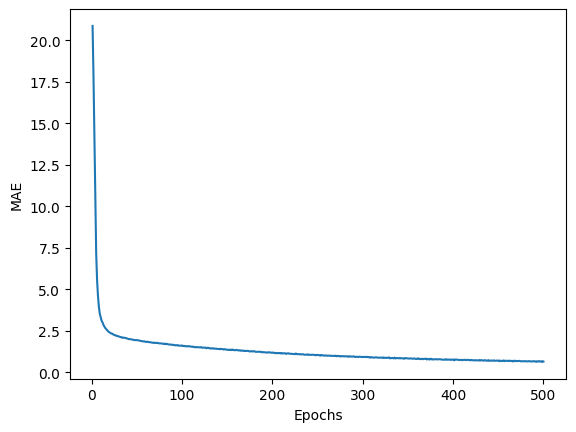

In [40]:
plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show();

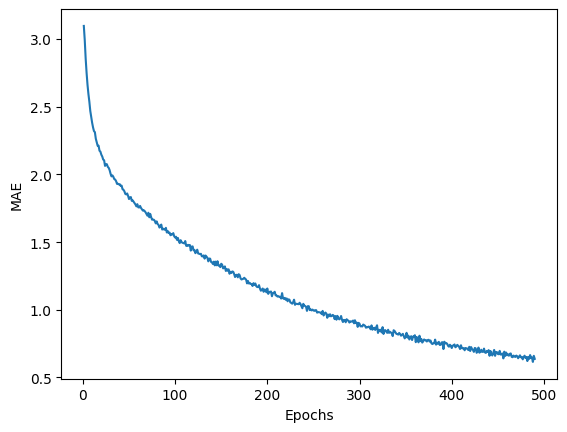

In [46]:
truncated_mae_hist = average_mae_hist[10:]
plt.plot(range(1, len(truncated_mae_hist) + 1), truncated_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [53]:
model = build_model()
model.fit(
    X_train, y_train,
    epochs=130,
    batch_size=16,
    verbose=0
)

In [54]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 15.4389 - mae: 2.5121


[15.438918113708496, 2.5120580196380615]

In [55]:
pred = model.predict(X_test)
pred[0]

4/4 [==============================] - 0s 4ms/step


array([7.9699173], dtype=float32)

In [57]:
y_test[0]

7.2

In [62]:
float(pred[0])

7.969917297363281

In [ ]:
pred = [float(elem) for elem in pred]

In [64]:
for price in zip(pred, y_test):
  print(price)

(7.969917297363281, 7.2)
(18.897171020507812, 18.8)
(20.93614959716797, 19.0)
(32.389556884765625, 27.0)
(25.22125816345215, 22.2)
(21.94757080078125, 24.5)
(26.543697357177734, 31.2)
(21.598979949951172, 22.9)
(19.54311752319336, 20.5)
(20.5867919921875, 23.2)
(19.515033721923828, 18.6)
(16.258350372314453, 14.5)
(15.423287391662598, 17.8)
(42.923614501953125, 50.0)
(21.822505950927734, 20.8)
(19.806528091430664, 24.3)
(24.99509048461914, 24.2)
(18.019187927246094, 19.8)
(18.843406677246094, 19.1)
(25.702289581298828, 22.7)
(9.181771278381348, 12.0)
(11.15405559539795, 10.2)
(21.065311431884766, 20.0)
(15.573691368103027, 18.5)
(19.004959106445312, 20.9)
(21.701108932495117, 23.0)
(29.132719039916992, 27.5)
(29.299678802490234, 30.1)
(11.545220375061035, 9.5)
(18.862977981567383, 22.0)
(19.3270263671875, 21.2)
(14.036674499511719, 14.1)
(31.705318450927734, 33.1)
(23.345731735229492, 23.4)
(19.23582649230957, 20.1)
(6.85478401184082, 7.4)
(15.774822235107422, 15.4)
(18.72287368774414,

When you start fitting process and this banger comes on (loud sound of pc fans)<br>
<img src='https://media.tenor.com/lPPuJTHmRc0AAAAM/djkhaled-dj.gif'>